# Exploratory Data Analysis of Netflix Titles

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style="darkgrid")

### Importing Dataset

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


### Data Overview

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [4]:
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

### Missing values consist of :
- "director" : I will be dropping this column since its not of much practical use for this analysis.
- "cast" : Similarly for cast, I will be dropping this column.
- "country" : Since this is an important variable for the analysis,  I am going to take the mode of available countries and assign it to the missing values.
- "date_added" : Similar treatment as the country column.
- "rating" : There are only 7 missing cases which can be easily found on the net so I will replace them manually.

### Data Cleaning and Manipulation

In [5]:
df.drop(['cast' , 'director'] , axis = 1 , inplace = True) 

In [6]:
df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', nan,
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

In [7]:
df[df['rating'].isna()]

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description
67,s68,Movie,13TH: A Conversation with Oprah Winfrey & Ava ...,NaN,"January 26, 2017",2017,NaN,37 min,Movies,Oprah Winfrey sits down with director Ava DuVe...
2359,s2360,TV Show,Gargantia on the Verdurous Planet,Japan,"December 1, 2016",2013,NaN,1 Season,"Anime Series, International TV Shows","After falling through a wormhole, a space-dwel..."
3660,s3661,TV Show,Little Lunch,Australia,"February 1, 2018",2015,NaN,1 Season,"Kids' TV, TV Comedies","Adopting a child's perspective, this show take..."
3736,s3737,Movie,Louis C.K. 2017,United States,"April 4, 2017",2017,NaN,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
3737,s3738,Movie,Louis C.K.: Hilarious,United States,"September 16, 2016",2010,NaN,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
3738,s3739,Movie,Louis C.K.: Live at the Comedy Store,United States,"August 15, 2016",2015,NaN,66 min,Movies,The comic puts his trademark hilarious/thought...
4323,s4324,Movie,My Honor Was Loyalty,Italy,"March 1, 2017",2015,NaN,115 min,Dramas,"Amid the chaos and horror of World War II, a c..."


In [8]:
rating_replacements = {
    67: 'TV-PG',
    2359: 'TV-14',
    3660: 'TV-MA',
    3736: 'TV-MA',
    3737: 'NR',
    3738: 'TV-MA',
    4323: 'TV-MA '
}

for id, rate in rating_replacements.items():
    df.iloc[id, 6] = rate
    
df['rating'].isna().sum()

0

In [9]:
df['country'] = df['country'].fillna(df['country'].mode()[0])
df['date_added'] = df['date_added'].fillna(df['date_added'].mode()[0])
df.isna().sum()

show_id         0
type            0
title           0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df['country_main'] = df['country'].apply(lambda x : x.split(",")[0])
df['country_main'].head()

0           Brazil
1           Mexico
2        Singapore
3    United States
4    United States
Name: country_main, dtype: object

There are many entries in the dataset in which the 'country' column consists of more than one value. We added a new column namely 'country_main' in which we consider only one country to make our analyis easier.

In [12]:
df['year_added'] = df['date_added'].apply(lambda x : x.split(" ")[-1])
df['year_added'].head()

0    2020
1    2016
2    2018
3    2017
4    2020
Name: year_added, dtype: object

In [13]:
df.date_added = df.date_added.str.lstrip()
df['month_added'] = df['date_added'].apply(lambda x : x.split(" ")[0])
df['month_added'].head()

0      August
1    December
2    December
3    November
4     January
Name: month_added, dtype: object

In [14]:
ratings_ages = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-MA ': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
df['target_age'] = df['rating'].replace(ratings_ages)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   country       7787 non-null   object
 4   date_added    7787 non-null   object
 5   release_year  7787 non-null   int64 
 6   rating        7787 non-null   object
 7   duration      7787 non-null   object
 8   listed_in     7787 non-null   object
 9   description   7787 non-null   object
 10  country_main  7787 non-null   object
 11  year_added    7787 non-null   object
 12  month_added   7787 non-null   object
 13  target_age    7787 non-null   object
dtypes: int64(1), object(13)
memory usage: 851.8+ KB


In [16]:
df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,country_main,year_added,month_added,target_age
0,s1,TV Show,3%,Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,Brazil,2020,August,Adults
1,s2,Movie,7:19,Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,Mexico,2016,December,Adults
2,s3,Movie,23:59,Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",Singapore,2018,December,Adults
3,s4,Movie,9,United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",United States,2017,November,Teens
4,s5,Movie,21,United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...,United States,2020,January,Teens


### Data Visualization

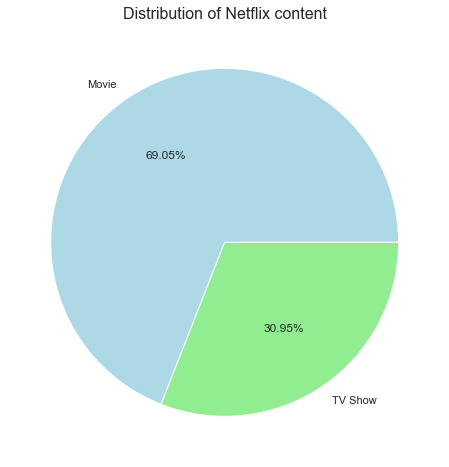

In [17]:
dt = df.type.value_counts().reset_index()
plt.figure(figsize = (8,8))
plt.pie(df.type.value_counts() , labels = dt['index'] , autopct = '%.2f%%' , colors = ['lightblue' , 'lightgreen'])
plt.title('Distribution of Netflix content' , fontsize = 16)
plt.show()


Nearly 31% of content on Netflix consists of TV shows

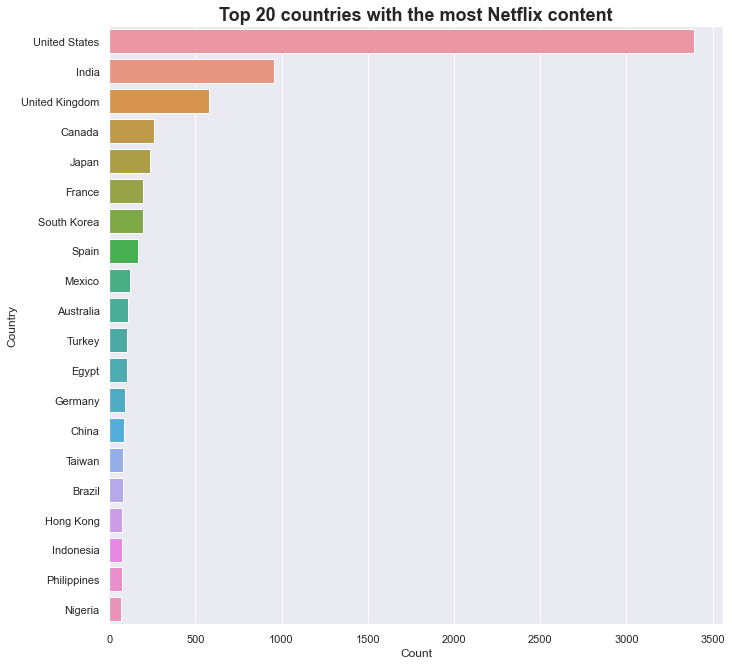

In [18]:
data_1 = df['country_main'].value_counts().reset_index().head(20)
data_1.columns = ['Country' , 'Count']

plt.figure(figsize = (11,11))
sns.barplot(x = 'Count' , y = 'Country' , data = data_1)
plt.title('Top 20 countries with the most Netflix content' , fontdict={ 'fontweight' : 'bold', 'fontsize' : 18 })
plt.show()

United States leads the pack with a huge margin with more than 3000+ titles to its name. USA is followed by India in the second place which is quite a feat since Netflix only came to India in January 2016. In a matter of only 5 years India has managed to rise through the ranks to be the second highest content creator. 

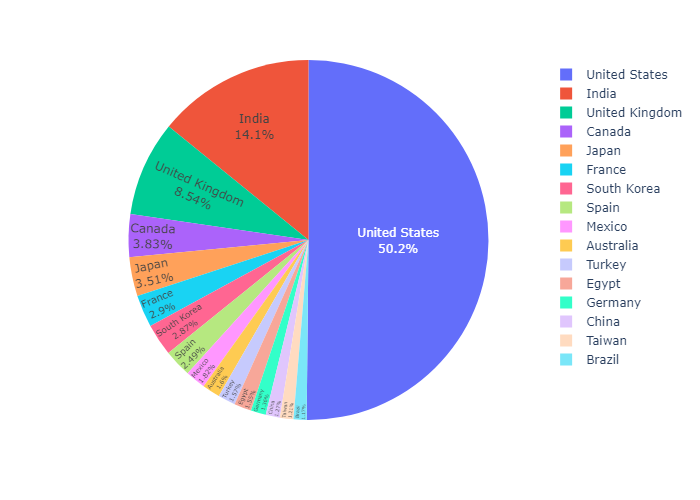

In [19]:
country_df = df['country_main'].value_counts().reset_index()
country_df = country_df[country_df['country_main'] /  country_df['country_main'].sum() > 0.01]

fig = px.pie(country_df, values='country_main', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show(renderer="png")

The pie chart above clearly shows the dominance of USA in the amount of Netflix Titles produced. The numbers for USA are a little boosted since we used mode to fill the missing values but nevertheless United States is still ahead by a huge margin.

In [20]:
df.replace("TV-MA " , "TV-MA" , inplace = True) # a single entry had an extra whitespace

In [21]:
np.unique(df.rating)

array(['G', 'NC-17', 'NR', 'PG', 'PG-13', 'R', 'TV-14', 'TV-G', 'TV-MA',
       'TV-PG', 'TV-Y', 'TV-Y7', 'TV-Y7-FV', 'UR'], dtype=object)

In [22]:
movies_df = df[df['type'] == 'Movie']
tv_df = df[df['type'] == 'TV Show']

Creating two different dataframes on the basis of type of content i.e. Movies and TV Shows.

In [23]:
movies_rating = movies_df.groupby(['rating'])['show_id'].count().reset_index().sort_values('show_id' , ascending = False)
movies_rating.columns = ['rating' , 'count']
movies_rating

,rating,count
8,TV-MA,1848
6,TV-14,1272
5,R,663
9,TV-PG,506
4,PG-13,386
3,PG,247
10,TV-Y,117
7,TV-G,111
11,TV-Y7,95
2,NR,80


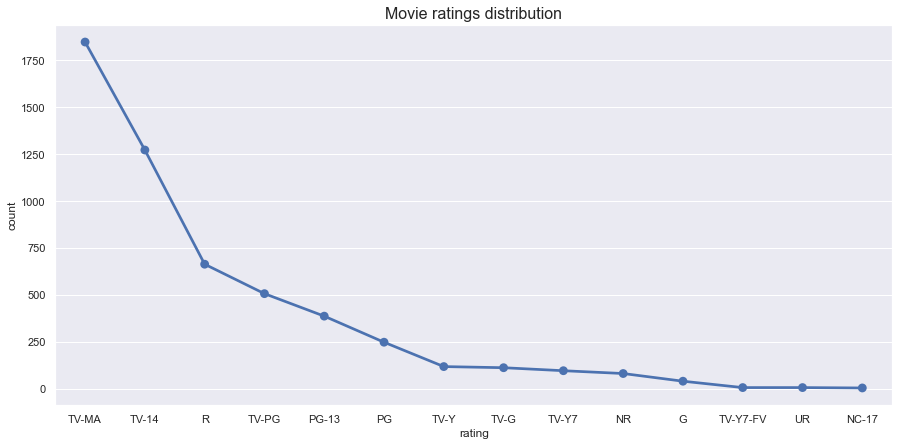

In [24]:
plt.figure(figsize = (15,7))
sns.pointplot(x = 'rating', y = 'count' , data = movies_rating)
plt.title('Movie ratings distribution' , size = 16)
plt.show()

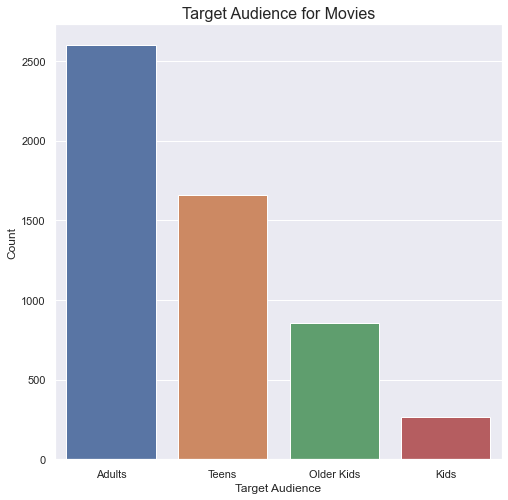

In [25]:
age_df = movies_df['target_age'].value_counts().reset_index()
age_df.columns = ['Target Audience' , 'Count']

plt.figure(figsize = (8,8))
sns.barplot(x = 'Target Audience' , y = 'Count' , data = age_df)
plt.title('Target Audience for Movies' , size = 16)
plt.show()

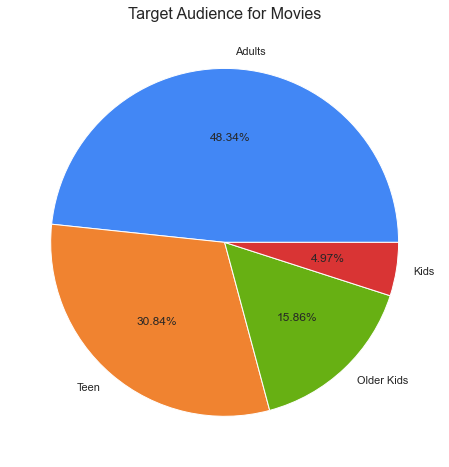

In [26]:
labels = ['Adults' , 'Teen' , 'Older Kids' , 'Kids']
plt.figure(figsize = (8,8))
plt.pie(movies_df['target_age'].value_counts() ,labels = labels ,autopct = '%.2f%%' , 
        colors = ['#4287f5','#f08330','#67b013','#d93434'])
plt.title('Target Audience for Movies' , size = 16)
plt.show()

Almost 50% of the movies target adult audiences

In [27]:
tv_rating = tv_df.groupby(['rating'])['show_id'].count().reset_index().sort_values('show_id' , ascending = False)
tv_rating.columns = ['rating' , 'count']
tv_rating

,rating,count
4,TV-MA,1019
2,TV-14,660
5,TV-PG,301
7,TV-Y7,176
6,TV-Y,163
3,TV-G,83
0,NR,5
1,R,2
8,TV-Y7-FV,1


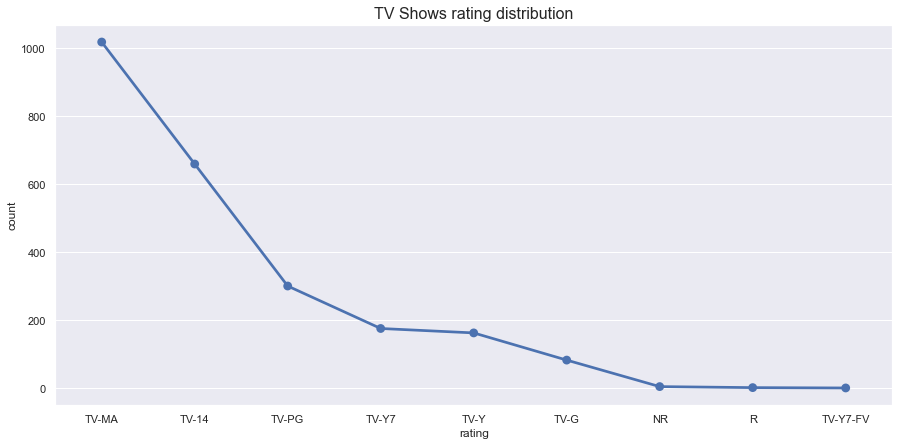

In [28]:
plt.figure(figsize = (15,7))
sns.pointplot(x = 'rating', y = 'count' , data = tv_rating)
plt.title('TV Shows rating distribution' , size = 16)
plt.show()

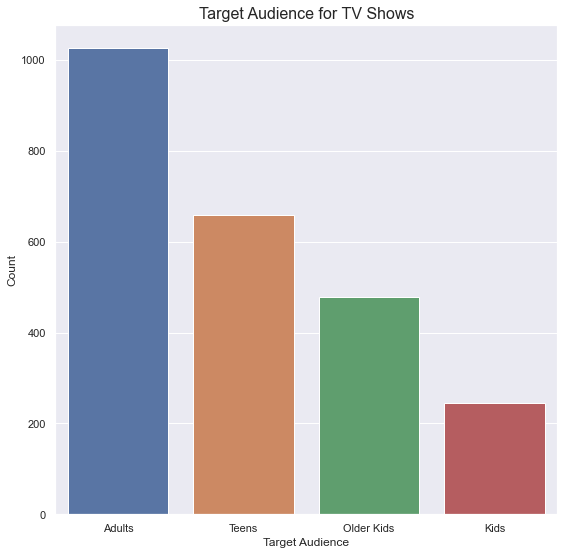

In [29]:
age_df = tv_df['target_age'].value_counts().reset_index()
age_df.columns = ['Target Audience' , 'Count']

plt.figure(figsize = (9,9))
sns.barplot(x = 'Target Audience' , y = 'Count' , data = age_df )
plt.title('Target Audience for TV Shows' , size = 16)
plt.show()

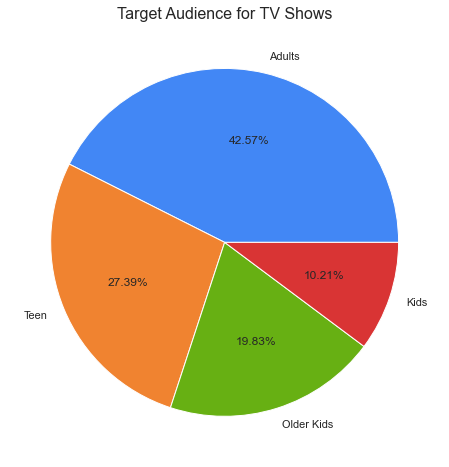

In [30]:
labels = ['Adults' , 'Teen' , 'Older Kids' , 'Kids']
plt.figure(figsize = (8,8))
plt.pie(tv_df['target_age'].value_counts() ,labels = labels ,autopct = '%.2f%%',
       colors = ['#4287f5','#f08330','#67b013','#d93434'])
plt.title('Target Audience for TV Shows' , size = 16)
plt.show()

We can observe that in case of TV shows Kids and Older Kids have a higher percentage when compared to movies. 

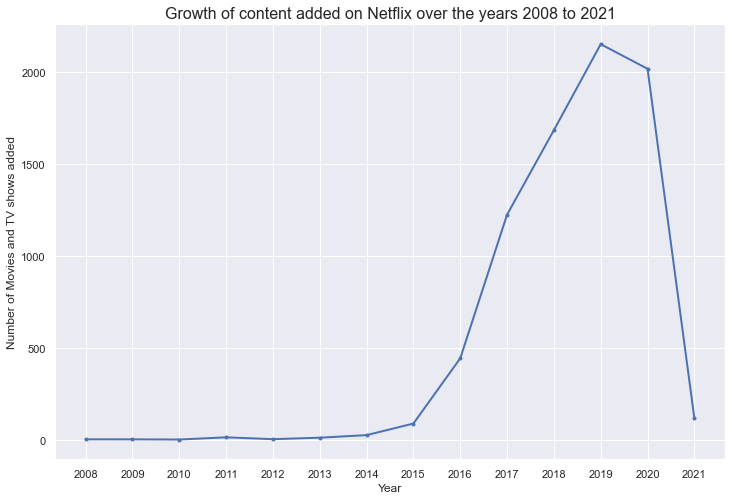

In [31]:
df_content = df.groupby(['year_added'])['show_id'].count().reset_index().rename(columns = 
                {'index' : 'year added' , 'show_id' : 'Count'})

plt.figure(figsize = (12,8))
plt.plot(df_content.year_added, df_content.Count, 'b.-' , linewidth = 2)
plt.title('Growth of content added on Netflix over the years 2008 to 2021' , size = 16)
plt.xlabel('Year')
plt.ylabel('Number of Movies and TV shows added')
plt.show()

Netflix has constantly seen a consistent growth in amount of titles being released per year since 2014. We can observe that the number of titles skyrocketed after 2015. The year 2019 and 2020 saw more than 2000+ titles being produced. A slight dip is observed from 2019 to 2020 because of Covid-19 restrictions. During the pandemic, there was definitely an increase in the number of paid subscribers. But the entertainment industry took a hit due to shooting restrictions. Also, this dataset contains titles only upto January 2021. That explains the dip for the year 2021.

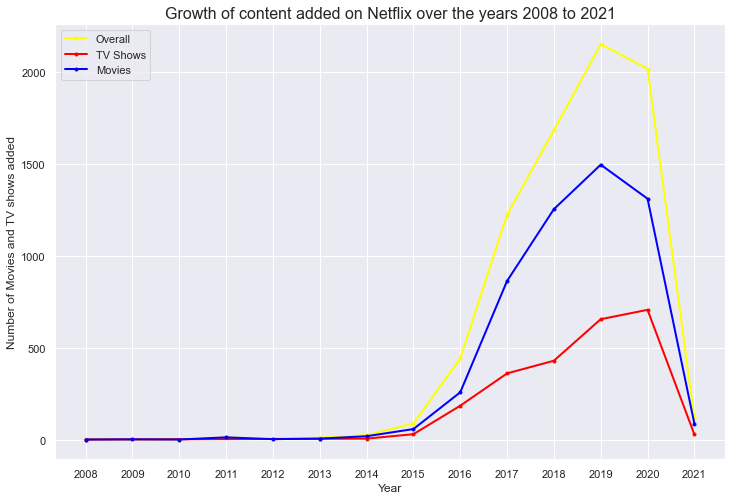

In [32]:
movies_content = movies_df.groupby(['year_added'])['show_id'].count().reset_index().rename(columns = 
                {'index' : 'year added' , 'show_id' : 'Count'})
tv_content = tv_df.groupby(['year_added'])['show_id'].count().reset_index().rename(columns = 
                {'index' : 'year added' , 'show_id' : 'Count'})

plt.figure(figsize = (12,8))

plt.plot(df_content.year_added, df_content.Count, marker = '.' , linewidth = 2, label = 'Overall' , color = 'yellow')
plt.plot(tv_content.year_added, tv_content.Count, marker = '.' , linewidth = 2 , label = 'TV Shows' , color = 'red' )
plt.plot(movies_content.year_added, movies_content.Count, marker = '.' , linewidth = 2 , label = 'Movies', color = 'blue')
plt.title('Growth of content added on Netflix over the years 2008 to 2021' , size = 16)
plt.xlabel('Year')
plt.ylabel('Number of Movies and TV shows added')

plt.legend()
plt.show()



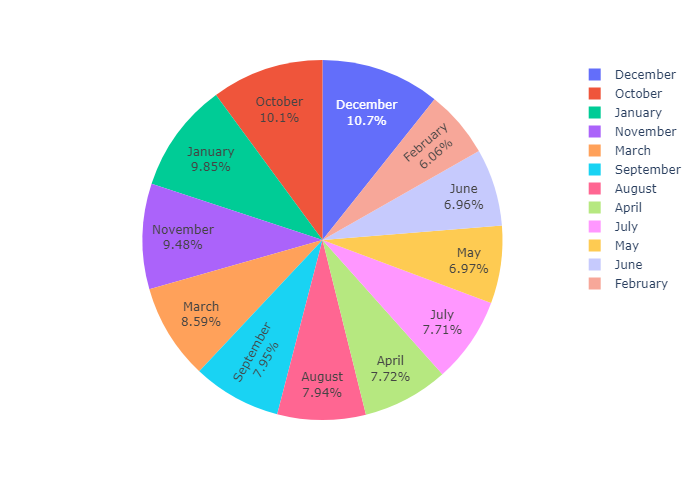

In [33]:
months = df['month_added'].value_counts().reset_index()

fig = px.pie(months, values='month_added', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show(renderer="png")


Most content is added in the month of December. Since it is holiday season in December, it makes sense that December leads in terms of content added.

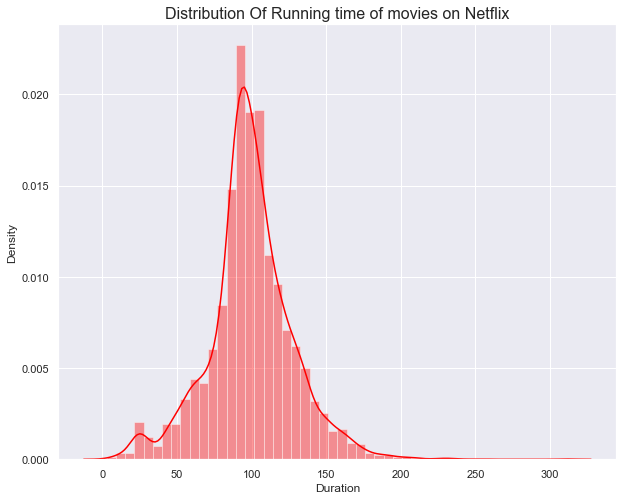

In [34]:
movies_df['minutes'] = movies_df['duration'].apply(lambda x : x.split(" ")[0])

plt.figure(figsize = (10,8))
sns.distplot(movies_df['minutes'], color = 'red')
plt.title('Distribution Of Running time of movies on Netflix', size = 16)
plt.xlabel('Duration')
plt.show()

It is evident that majority of the movies have duration ranging from 85 min to 110 min.



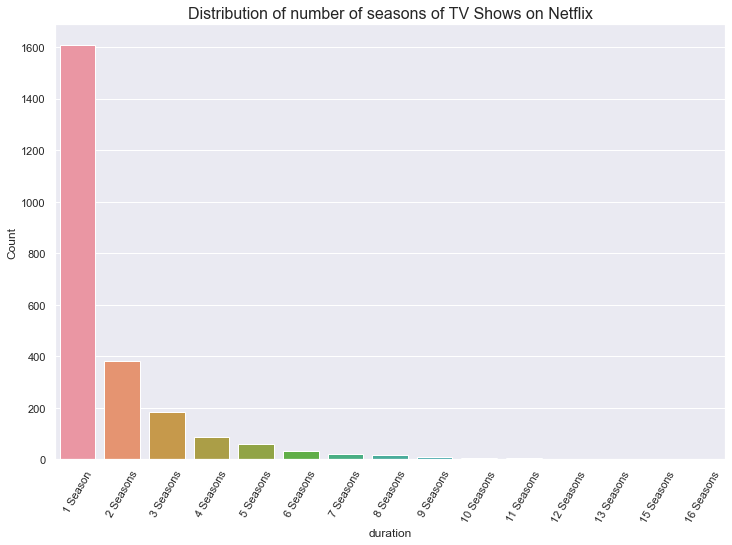

In [35]:
data = tv_df.groupby(['duration'])['show_id'].count().reset_index().rename(columns = 
        {'index' : 'Duration' , 'show_id' : 'Count'}).sort_values(['Count'] , ascending = False)
plt.figure(figsize = (12,8))
sns.barplot(x = 'duration' , y = 'Count' , data = data)
plt.title('Distribution of number of seasons of TV Shows on Netflix' , size = 16)
plt.xticks(rotation = 60)
plt.show()


Majority of shows only go upto 6-7 seasons with only a tiny amount going for more than 8 seasons.

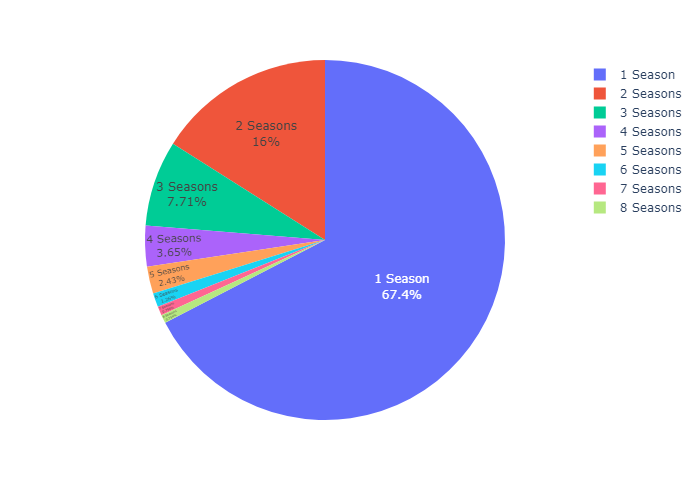

In [36]:
data = tv_df['duration'].value_counts().reset_index()
data = data[data['duration'] /  data['duration'].sum() > 0.005]

fig = px.pie(data, values='duration', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show(renderer="png")

This pie chart further emphasizes on the fact that almost all TV shows run for less than 8 seasons.

### A deeper look into India's performance over the previous years

Netflix India's performance looks quite impressive since its introduction in January 2016. Lets take a deeper dive into this. 

In [37]:
india_df = df[df['country'] == 'India']
india_df.head()

,show_id,type,title,country,date_added,release_year,rating,duration,listed_in,description,country_main,year_added,month_added,target_age
8,s9,Movie,706,India,"April 1, 2019",2019,TV-14,118 min,"Horror Movies, International Movies","When a doctor goes missing, his psychiatrist w...",India,2019,April,Teens
9,s10,Movie,1920,India,"December 15, 2017",2008,TV-MA,143 min,"Horror Movies, International Movies, Thrillers",An architect and his wife move into a castle t...,India,2017,December,Adults
18,s19,Movie,15-Aug,India,"March 29, 2019",2019,TV-14,124 min,"Comedies, Dramas, Independent Movies","On India's Independence Day, a zany mishap in ...",India,2019,March,Teens
20,s21,Movie,​​Kuch Bheege Alfaaz,India,"September 1, 2018",2018,TV-14,110 min,"Dramas, Independent Movies, International Movies",After accidentally connecting over the Interne...,India,2018,September,Teens
21,s22,Movie,​Goli Soda 2,India,"September 15, 2018",2018,TV-14,128 min,"Action & Adventure, Dramas, International Movies","A taxi driver, a gangster and an athlete strug...",India,2018,September,Teens


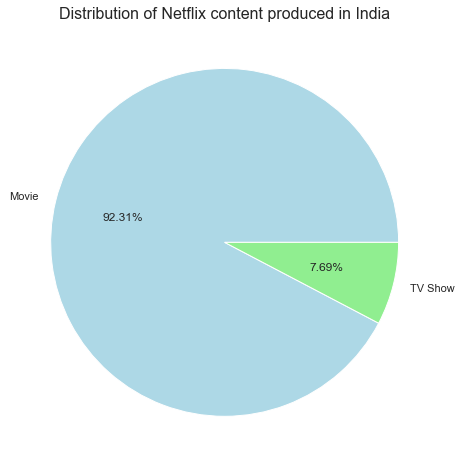

In [38]:
data = india_df.type.value_counts().reset_index()
plt.figure(figsize = (8,8))
plt.pie(india_df.type.value_counts() , labels = data['index'] , autopct = '%.2f%%' , colors = ['lightblue' , 'lightgreen'])
plt.title('Distribution of Netflix content produced in India' , fontsize = 16)
plt.show()

92.31% of the titles produced are movies which is much higher than the overall percentage which was around 69%.

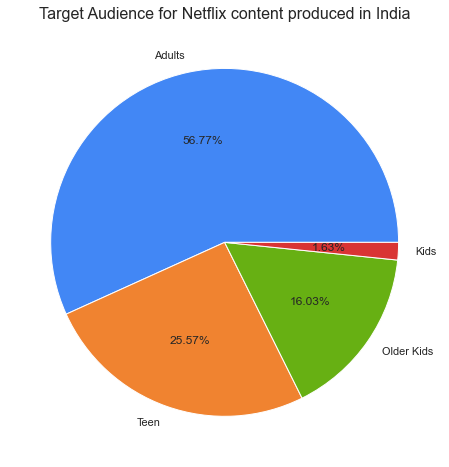

In [39]:
labels = ['Adults' , 'Teen' , 'Older Kids' , 'Kids']
plt.figure(figsize = (8,8))
plt.pie(india_df['target_age'].value_counts() ,labels = labels ,autopct = '%.2f%%',
       colors = ['#4287f5','#f08330','#67b013','#d93434'])
plt.title('Target Audience for Netflix content produced in India' , size = 16)
plt.show()

Almost 57% of the content produced in India is targeted towards Adults.

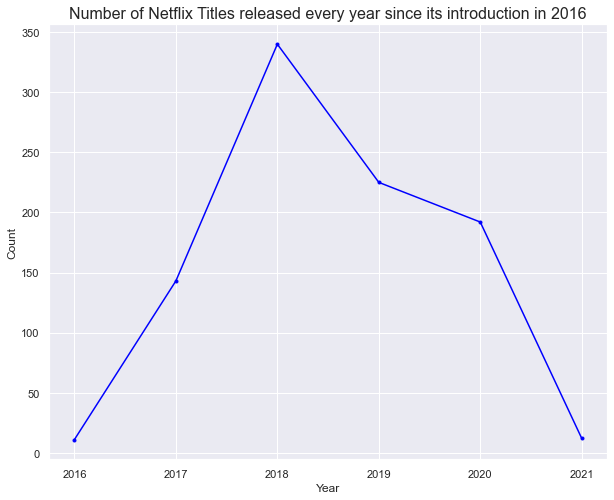

In [40]:
india_content = india_df.groupby(['year_added'])['show_id'].count().reset_index()
india_content.columns = ['Year' , 'Count']

plt.figure(figsize = (10,8))
plt.plot(india_content.Year , india_content.Count , marker = '.' , color = 'blue')
plt.title('Number of Netflix Titles released every year since its introduction in 2016' , size = 16)
plt.xlabel('Year')
plt.ylabel('Count')
plt.show()

This exponential rise from 2017 to 2018 is quite impressive. The number of titles saw an increase of more than two times. We saw a dip from 2019 to 2020 because of covid.

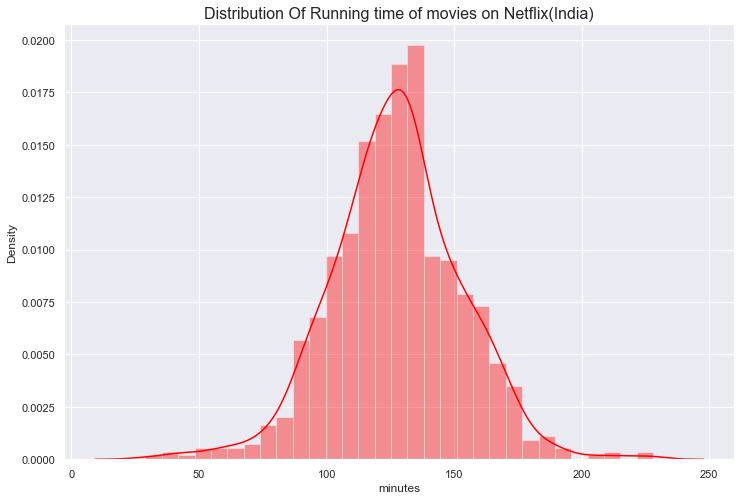

In [41]:
india_movies_df = india_df[india_df['type'] == 'Movie']
india_movies_df['minutes'] = india_movies_df['duration'].apply(lambda x: x.split(" ")[0])

plt.figure(figsize = (12,8))
sns.distplot(india_movies_df['minutes'] , color = 'red')
plt.title('Distribution Of Running time of movies on Netflix(India)' , size =16)
plt.show()


The average running time is 110-140 minutes. We can observe that the running time of Indian movies is much higher than the overall average running time which is around 85-120 min. As we all know Bollywood movies are generally much longer than Hollywood movies. 

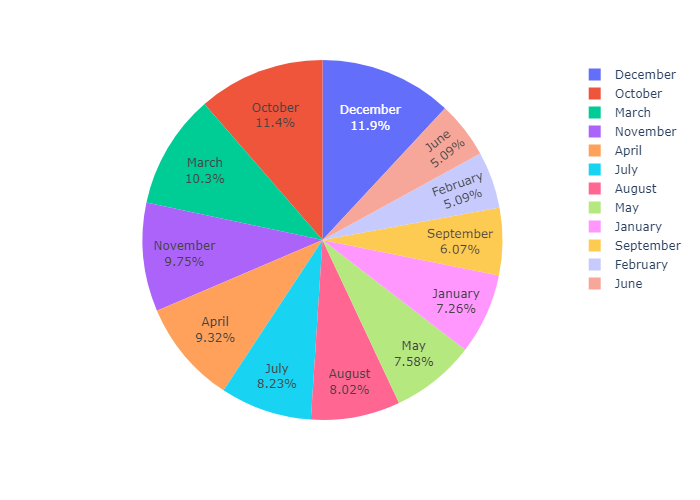

In [42]:
months = india_df['month_added'].value_counts().reset_index()

fig = px.pie(months, values='month_added', names='index')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show(renderer="png")

Here also we can observe a similar trend as above. December is the most preferred month for adding new content.